# Exploratory Data Analysis (EDA) 

## Importing Libraries

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import json
from pickle import dump

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

import joblib


## Problem statement and data collection

In [5]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=421&path=diabetes.csv")
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Exploration and data cleaning

#### Understanding the features
1) Pregnancies. Number of pregnancies of the patient (numeric)

2) Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

3) BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)

4) SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)

5) Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)

6) BMI. Body mass index (numeric)

7) DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)

8) Age. Age of patient (numeric)

9) Outcome (TARGET) Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)


In [8]:
print(f'Our dataframe contains {df.shape[0]} rows and it has {df.shape[1]} features.')

Our dataframe contains 768 rows and it has 9 features.


### Identifying Duplicated and Null Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [11]:
df.duplicated().sum()

np.int64(0)

##### Conclusions: 
We do not have any null or duplicated values in the dataframe. We have categorical and numerical features. 

### Eliminating Irrelevant Information and dealing with null values
For this dataset, we will retain all features, as we believe each one plays an important role in predicting the target.

# Univariate Analysis

In [12]:
# Understanding how many type of features we have
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

## Categorical Variables Analysis

We do not have any categorical variables in this dataset.

## Numerical Variable Analysis

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

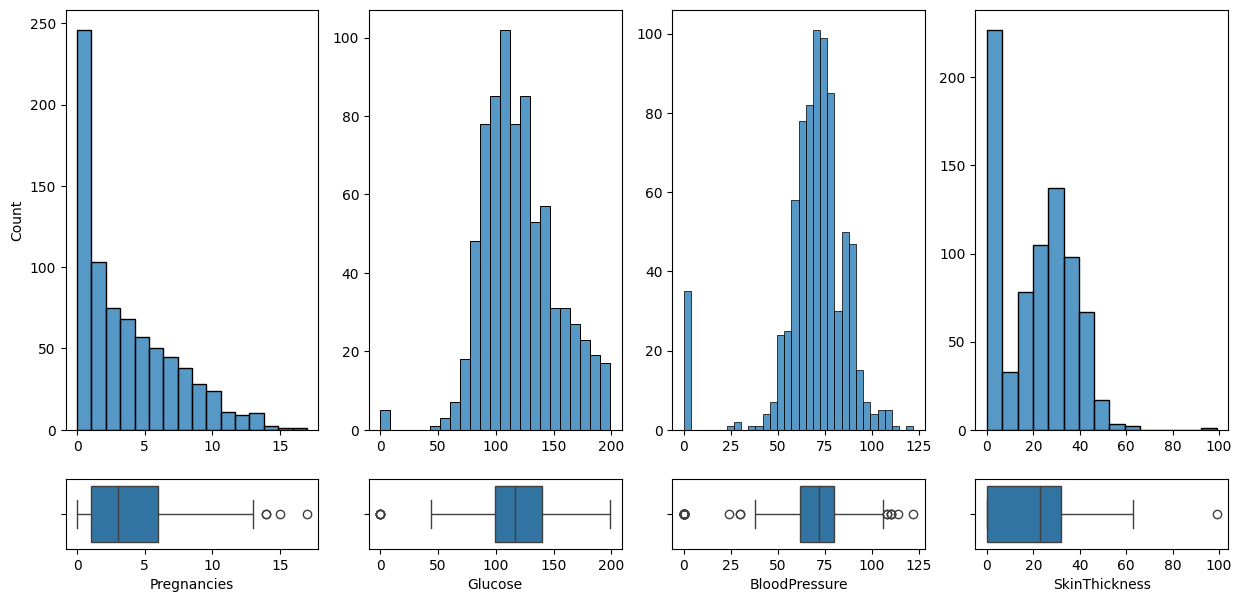

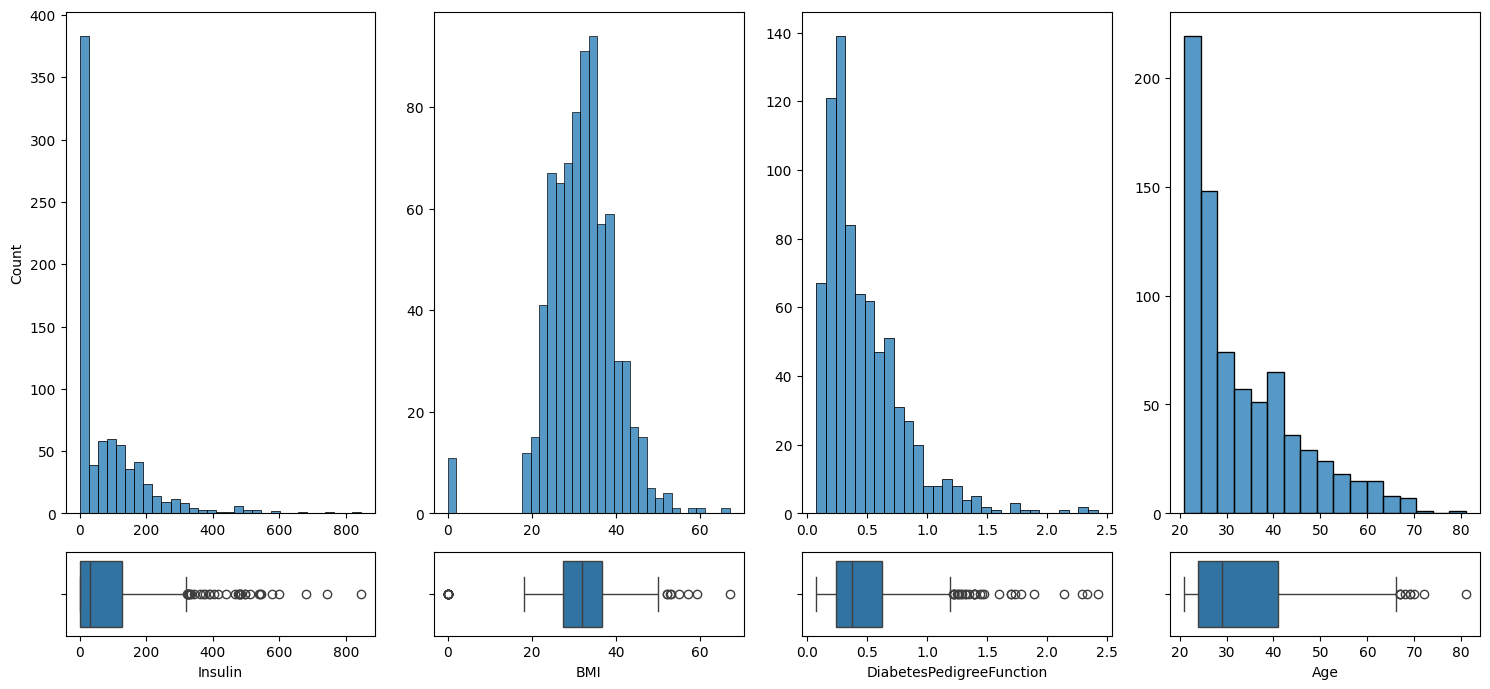

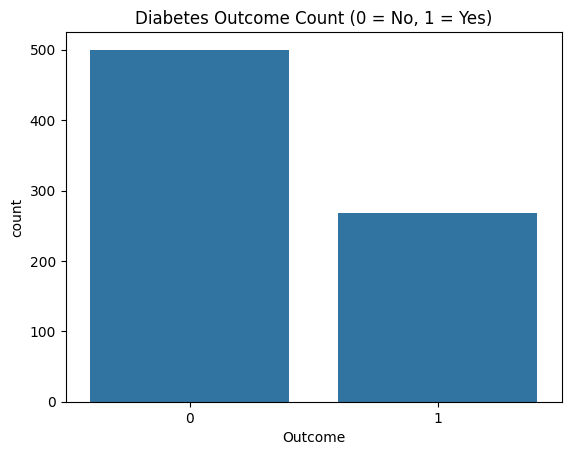

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [17]:
fig, axis = plt.subplots(2, 4, figsize = (15, 7), gridspec_kw={'height_ratios': [6, 1]})


sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "BloodPressure")
sns.histplot(ax = axis[0, 3], data = df, x = "SkinThickness").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "SkinThickness")


fig, axis = plt.subplots(2, 4, figsize = (15, 7), gridspec_kw={'height_ratios': [6, 1]})


sns.histplot(ax = axis[0, 0], data = df, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Insulin")
sns.histplot(ax = axis[0, 1], data = df, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "BMI")
sns.histplot(ax = axis[0, 2], data = df, x = "DiabetesPedigreeFunction").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[0, 3], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "Age")

plt.tight_layout()


plt.show()


sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Count (0 = No, 1 = Yes)")
plt.show()

print(df["Outcome"].value_counts(normalize=True))

#### Conclusions

1) Pregnancies

Distribution is skewed to the right: most women had a low number of pregnancies. A few extreme cases.


2) Glucose

Many zeros (which are biologically impossible). Clear separation expected between diabetics and non-diabetics (higher glucose in diabetics).


3) BloodPressure

Should never be 0, but but there are quite a few. Distribution is otherwise centered around ~70–80.


4) SkinThickness

Very often zero (unrealistic). Skewed distribution with some high outliers.

5) Insulin

Extremely skewed with many zeros. Some very high values, strong outliers.

6) BMI

Looks more normally distributed, but again zeros appear (impossible BMI).


7) DiabetesPedigreeFunction

Right skewed but no impossible values.

8) Age

Right skewed, most patients are between 20–40. Some outliers up to 80+.


### The countplot for the target variable Outcome shows that the dataset is not perfectly balanced: there are more patients without diabetes than with diabetes. Roughly two-thirds of the patients are non-diabetic and about one-third are diabetic.

# Multivariate Analysis

### Numerical - Numerical

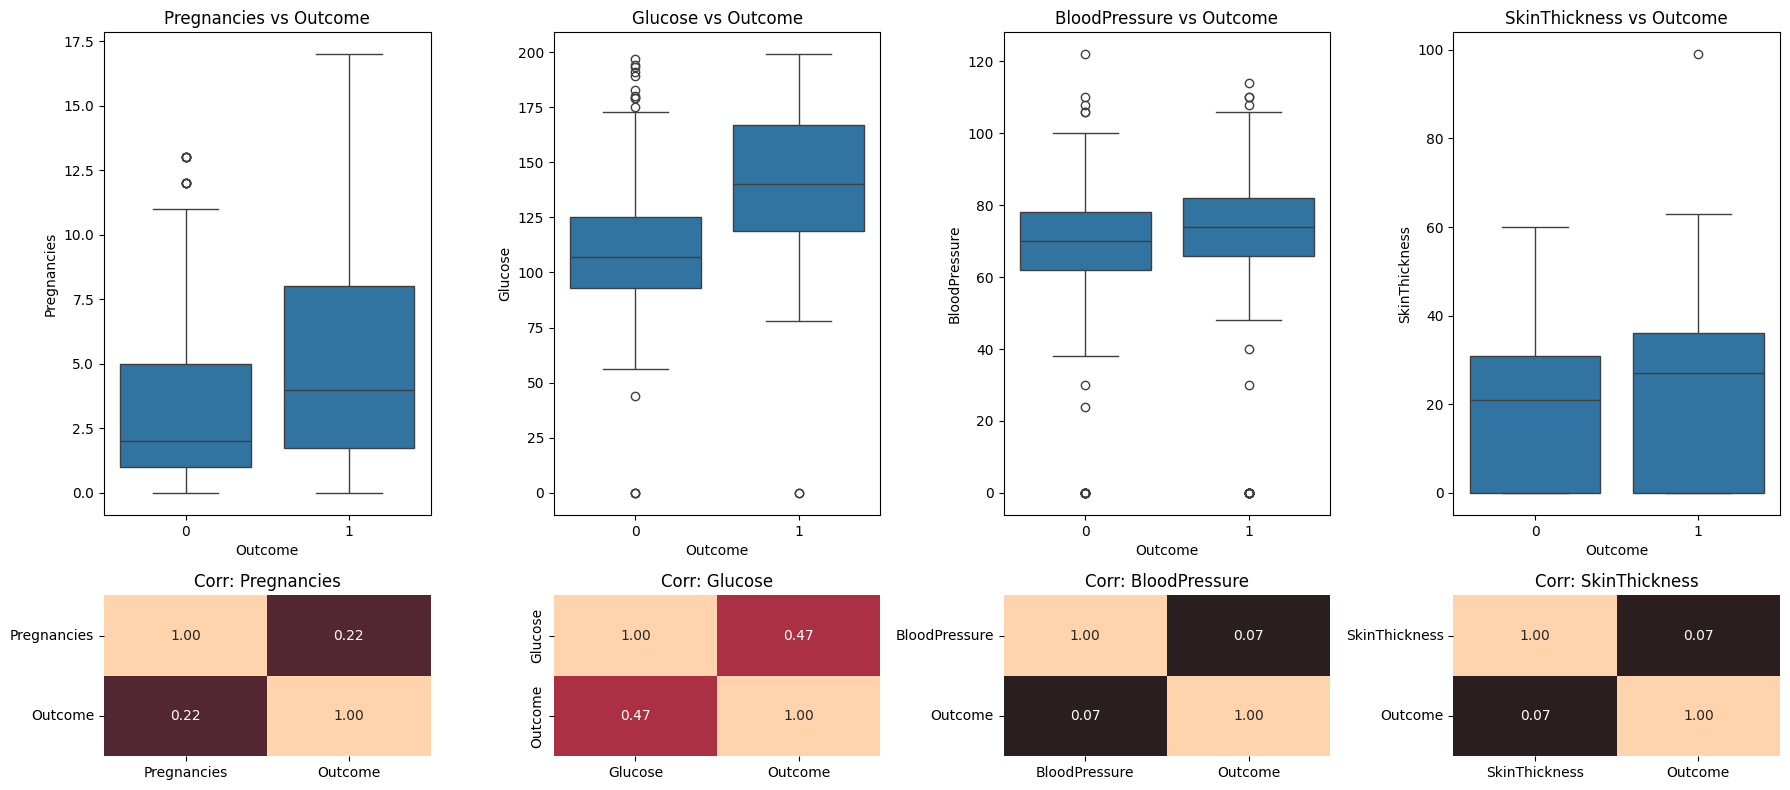

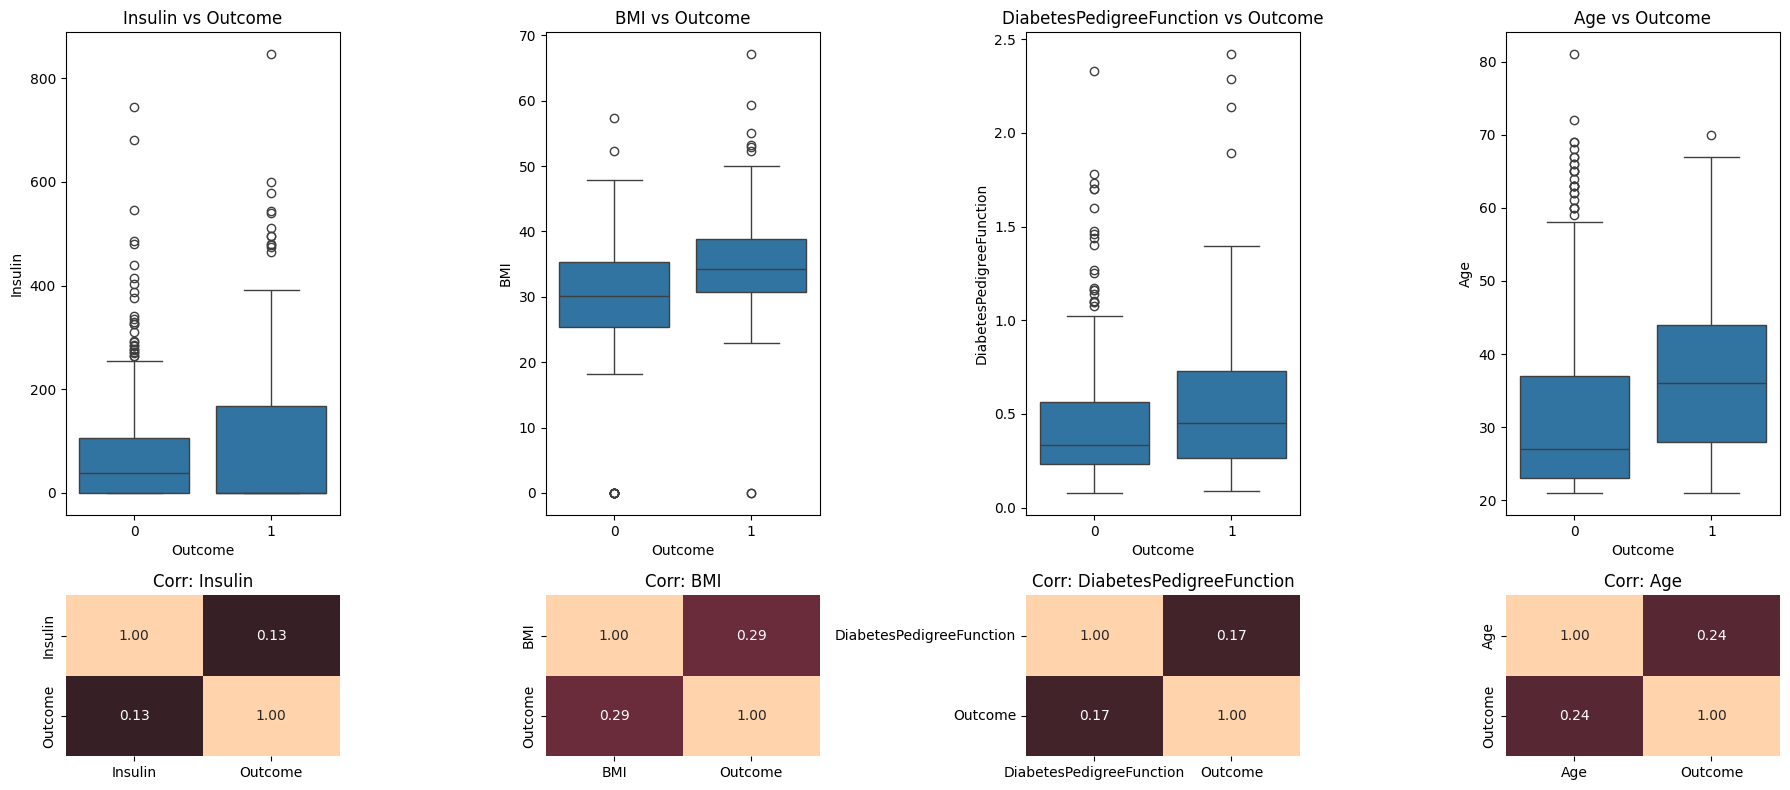

In [7]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# First 4 
fig, axes = plt.subplots(2, 4, figsize=(18, 8), gridspec_kw={'height_ratios': [3, 1]})
for i, col in enumerate(features[:4]):
    sns.boxplot(ax=axes[0, i], data=df, x="Outcome", y=col)
    axes[0, i].set_title(f"{col} vs Outcome")

    corr = df[[col, "Outcome"]].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", 
                center=0, cbar=False, ax=axes[1, i])
    axes[1, i].set_title(f"Corr: {col}")

plt.tight_layout()
plt.show()

# Next 4 
fig, axes = plt.subplots(2, 4, figsize=(18, 8), gridspec_kw={'height_ratios': [3, 1]})
for i, col in enumerate(features[4:]):
    sns.boxplot(ax=axes[0, i], data=df, x="Outcome", y=col)
    axes[0, i].set_title(f"{col} vs Outcome")

    corr = df[[col, "Outcome"]].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", 
                center=0, cbar=False, ax=axes[1, i])
    axes[1, i].set_title(f"Corr: {col}")

plt.tight_layout()
plt.show()

#### Conlusions

We used boxplots because the target is binary. This makes boxplots better than regression plots, since they clearly compare distributions between non-diabetic and diabetic patients.  

Glucose shows the biggest difference: higher in diabetic patients.

BMI, Age, and Pregnancies are also higher in the diabetic group.

BloodPressure, SkinThickness, and Insulin overlap a lot between groups, giving weaker separation.

Correlations confirm this: Glucose (0.47) is strongest, BMI (0.29) moderate, Age (0.24) and Pregnancies (0.22) smaller but still relevant.


### Correlation Analysis

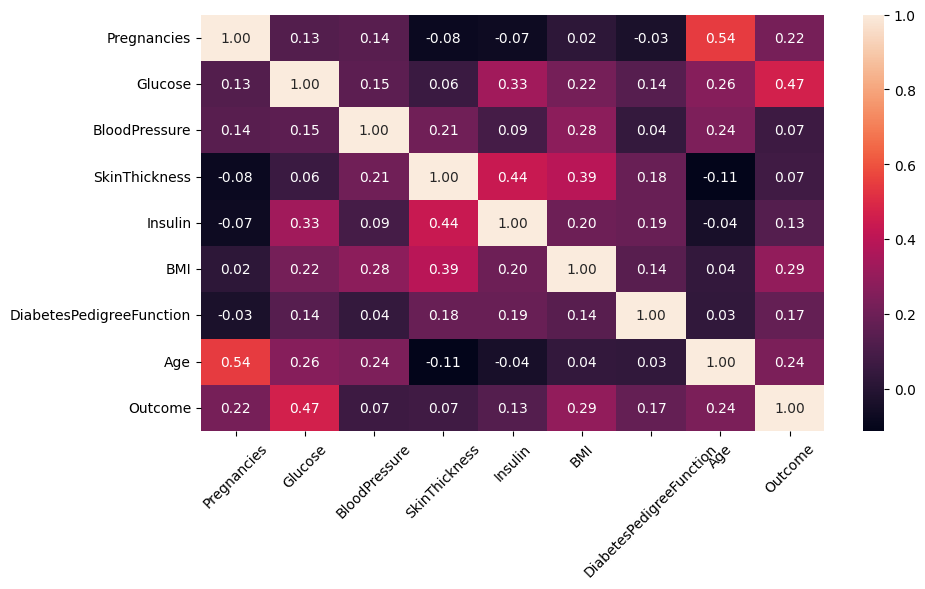

In [32]:
fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Glucose shows the strongest correlation with diabetes (0.47). BMI (0.29), Age (0.24), and Pregnancies (0.22) also relate to the outcome. BloodPressure, SkinThickness, and Insulin have very weak correlations. There are also moderate correlations between predictors, like Age–Pregnancies (0.54) and SkinThickness–Insulin (0.44). The matrix confirms the previous plots.

# Feature Engineering

## Outlier Analysis

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The dataset contains 768 observations. Average glucose is around 121, with a maximum of 199. BMI averages 32, and age averages 33 years (ranging from 21 to 81). Several variables show impossible minimum values of 0 (Glucose, BloodPressure, SkinThickness, Insulin, BMI), which indicate missing or incorrect data that must be handled during feature engineering.

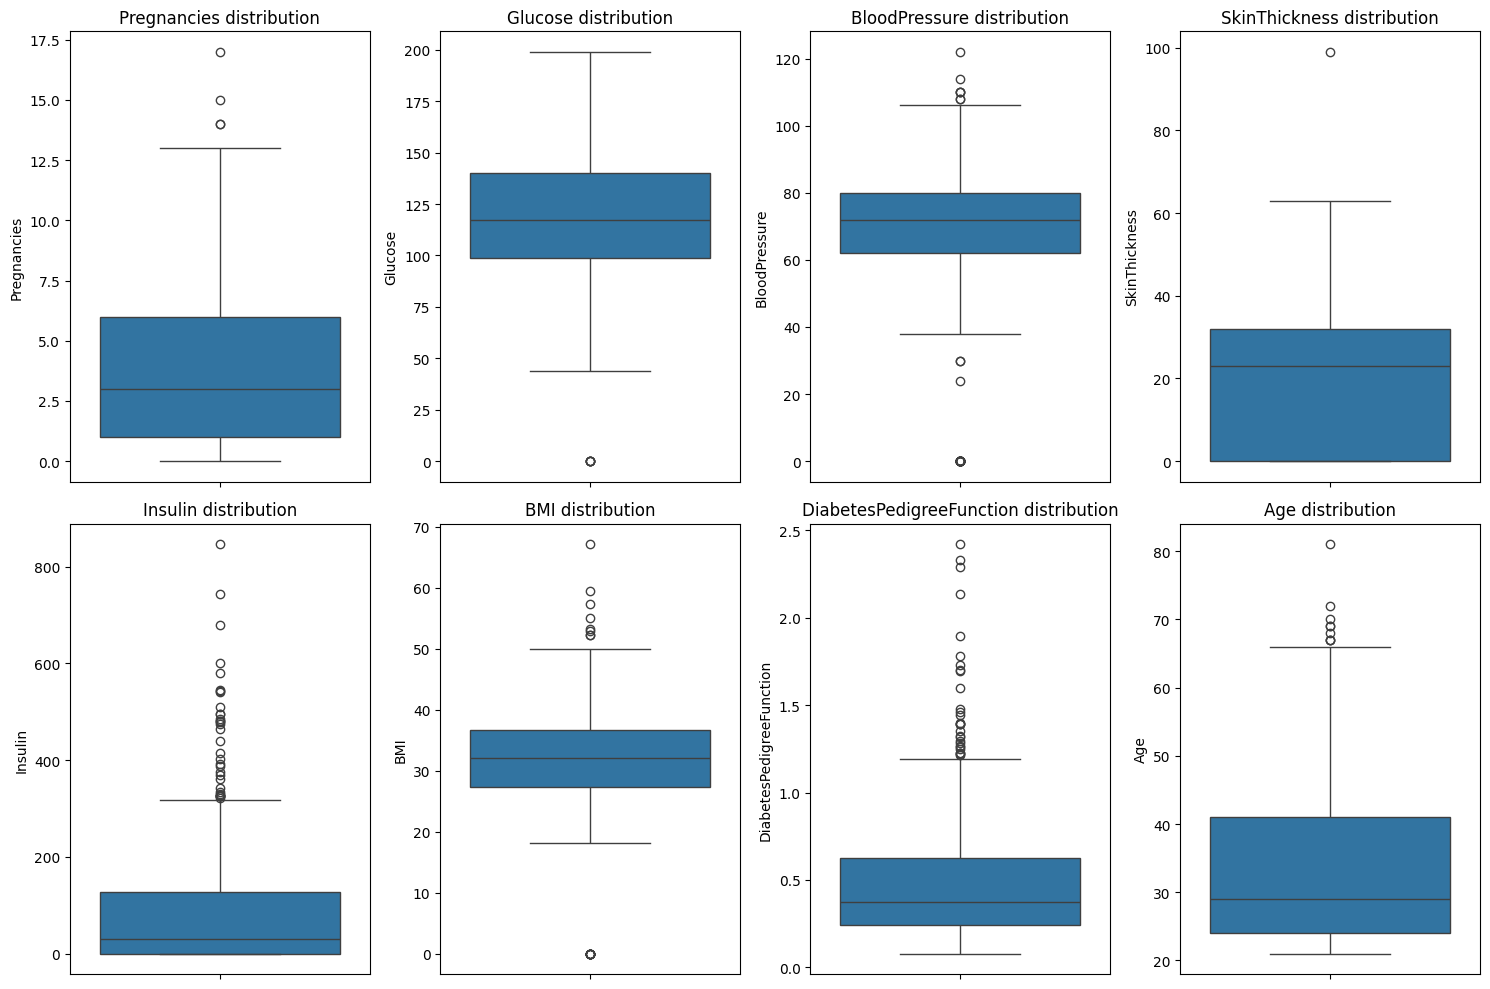

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(ax=axes[i], data=df, y=col)
    axes[i].set_title(f"{col} distribution")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Finding and Handling Exact Outliers

In [9]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
for column in features:
  stats = df[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["25%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of  {round(iqr, 2)}")


# Saving both datasets:
df_WITH_outliers = df.copy()
df_WITHOUT_outliers = df.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in features:
  df_WITHOUT_outliers, limit_list = replace_outliers_from_column(column, df_WITHOUT_outliers)
  outliers_dict[column] = limit_list

outliers_dict

The upper and lower limits for finding outliers are 13.5 and 0, with an interquartile range of  5.0
The upper and lower limits for finding outliers are 80.0 and 0, with an interquartile range of  32.0
The upper and lower limits for finding outliers are 318.12 and 0, with an interquartile range of  127.25
The upper and lower limits for finding outliers are 1.2 and 0, with an interquartile range of  0.38
The upper and lower limits for finding outliers are 66.5 and 0, with an interquartile range of  17.0


{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)]}

Outliers were handled and two datasets were kept: one with outliers (original) and one where outliers were capped at the calculated limits. This ensures that extreme values (e.g., very high Insulin or SkinThickness) do not distort the model training.

## Spliting Train and Test

In [11]:
from sklearn.model_selection import train_test_split

# target
y = df_WITH_outliers["Outcome"]

# dataset WITH outliers
X_WITH = df_WITH_outliers[features]
X_train_with, X_test_with, y_train, y_test = train_test_split(X_WITH, y, test_size=0.2, random_state=42)

# dataset WITHOUT outliers
X_WITHOUT = df_WITHOUT_outliers[features]
X_train_without, X_test_without = train_test_split(X_WITHOUT, test_size=0.2, random_state=42)


X_train_with.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


### Standardizing data

Since decision trees make decisions on individual features without considering the overall scale or distribution of the entire dataset, feature scaling generally does not improve their performance.

## Saving the datasets

In [26]:
# Save X train/test 
X_train_with.to_csv("../data/processed/X_train_with.csv", index=False)
X_test_with.to_csv("../data/processed/X_test_with.csv", index=False)

X_train_without.to_csv("../data/processed/X_train_without.csv", index=False)
X_test_without.to_csv("../data/processed/X_test_without.csv", index=False)

# Save y train/test
y_train.to_frame().to_csv("../data/processed/y_train.csv", index=False)
y_test.to_frame().to_csv("../data/processed/y_test.csv", index=False)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# with outliers
model_with = DecisionTreeClassifier(random_state = 42)
model_with.fit(X_train_with, y_train)
y_pred_with = model_with.predict(X_test_with)

# without outliers
model_without = DecisionTreeClassifier(random_state=42)
model_without.fit(X_train_without, y_train)
y_pred_without = model_without.predict(X_test_without)


In [19]:
print("WITH Outliers")
print("Accuracy:", accuracy_score(y_test, y_pred_with))

print("\nWITHOUT Outliers")
print("Accuracy:", accuracy_score(y_test, y_pred_without))

WITH Outliers
Accuracy: 0.7467532467532467

WITHOUT Outliers
Accuracy: 0.7337662337662337


### Conclusion

We trained two baseline decision tree models: one using the dataset with outliers and another with the outliers capped. The model with outliers achieved an accuracy of ~0.75, while the model without outliers was slightly lower at ~0.73. Therefore, we decided to continue with the dataset containing outliers, as it provides slightly better overall performance.

## Gini vs Entropy

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Gini
model_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
model_gini.fit(X_train_with, y_train)
y_pred_gini = model_gini.predict(X_test_with)
print("Gini Accuracy:", accuracy_score(y_test, y_pred_gini))

# entropy
model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_entropy.fit(X_train_with, y_train)
y_pred_entropy = model_entropy.predict(X_test_with)
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))

Gini Accuracy: 0.7467532467532467
Entropy Accuracy: 0.7207792207792207


For this dataset, the Gini criterion gives a better result. This means the way Gini measures node purity leads to better splits than Entropy here.

## Optimization using Gridsearch

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(criterion="gini", random_state=42), param_grid, cv=5, scoring="accuracy")

grid.fit(X_train_with, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_
print("Test Accuracy:", best_model.score(X_test_with, y_test))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Accuracy: 0.759016393442623
Test Accuracy: 0.7597402597402597


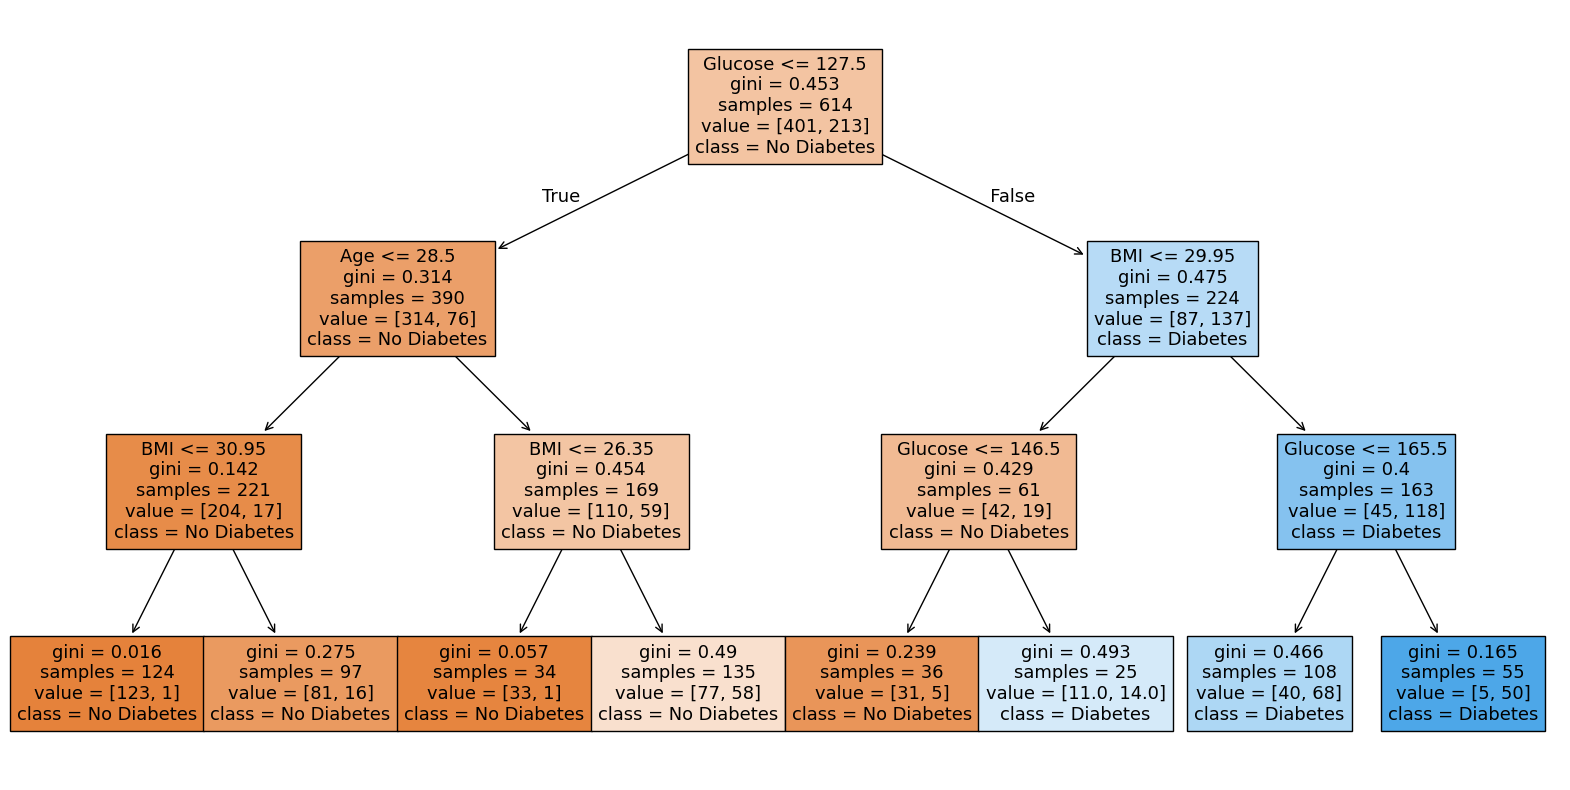

In [27]:
# Visualizing the tree

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    best_model,
    feature_names=X_train_with.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True
)
plt.show()

In [29]:
from pickle import dump

# Saving the final optimized model
dump(best_model, open("../models/decision_tree_diabetes_gini_final.sav", "wb"))

### Final Conclusions

This project aimed to predict diabetes using patient diagnostic data.

From the EDA, the most relevant features were Glucose, BMI, Age, and Pregnancies, since they showed the biggest differences between diabetic and non-diabetic patients. Other variables such as BloodPressure, SkinThickness, and Insulin showed weaker separation.

We compared datasets with and without outliers. The version with outliers performed slightly better, so it was kept.

For the baseline Decision Tree, we tested both Gini and Entropy as purity measures. The Gini criterion gave higher accuracy (~74.7% vs ~72.1%), so it was selected.

Using GridSearchCV to tune hyperparameters, the best configuration was found with max_depth=3, min_samples_split=2, and min_samples_leaf=4. This last model achieved about 76% accuracy on both cross-validation and the test set.

In conclusion, the optimized Decision Tree with Gini criterion offers a balanced model for predicting diabetes, with Glucose and BMI representing the most influential features.